In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Oct 12 13:31:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install gensim
!pip install Sastrawi
!pip install imblearn
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


# Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from gensim.utils import tokenize

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Load Data

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/dataset/data_tweet_praproses1.csv")

0    @Sukardi2017 Pada viralin jalan rusak di Lampu...
1    @arielsyahril @Sukardi2017 @aniesbaswedan Dari...
2    @Relawananies tidak satupun yang percaya Anies...
3                         @geloraco Mana mau anies nya
4    @achmadyusuft @Paltiwest jeklingko anies cuma ...
Name: TWEETS, dtype: object

In [ ]:
df

,TWEETS,SENTIMENT
0,@Sukardi2017 Pada viralin jalan rusak di Lampu...,NEGATIVE
1,@arielsyahril @Sukardi2017 @aniesbaswedan Dari...,POSITIVE
2,@Relawananies tidak satupun yang percaya Anies...,NEGATIVE
3,@geloraco Mana mau anies nya,NEGATIVE
4,@achmadyusuft @Paltiwest jeklingko anies cuma ...,NEGATIVE
...,...,...
2995,@yusuf_dumdum Terus kenapa Cebong takut ama An...,NEGATIVE
2996,@SyarifullahDja1 @Munir_Timur Sholat pencintra...,NEGATIVE
2997,@ekowboy2 Anis pinter tapi Ganjar lebih bejo,NEGATIVE
2998,"@musniumar Kalau survei Anies kalah,itu survei...",POSITIVE


#Check duplikasi data

In [ ]:
df.SENTIMENT.value_counts()

POSITIVE    1587
NEGATIVE    1413
Name: SENTIMENT, dtype: int64

<Axes: xlabel='SENTIMENT', ylabel='Count'>

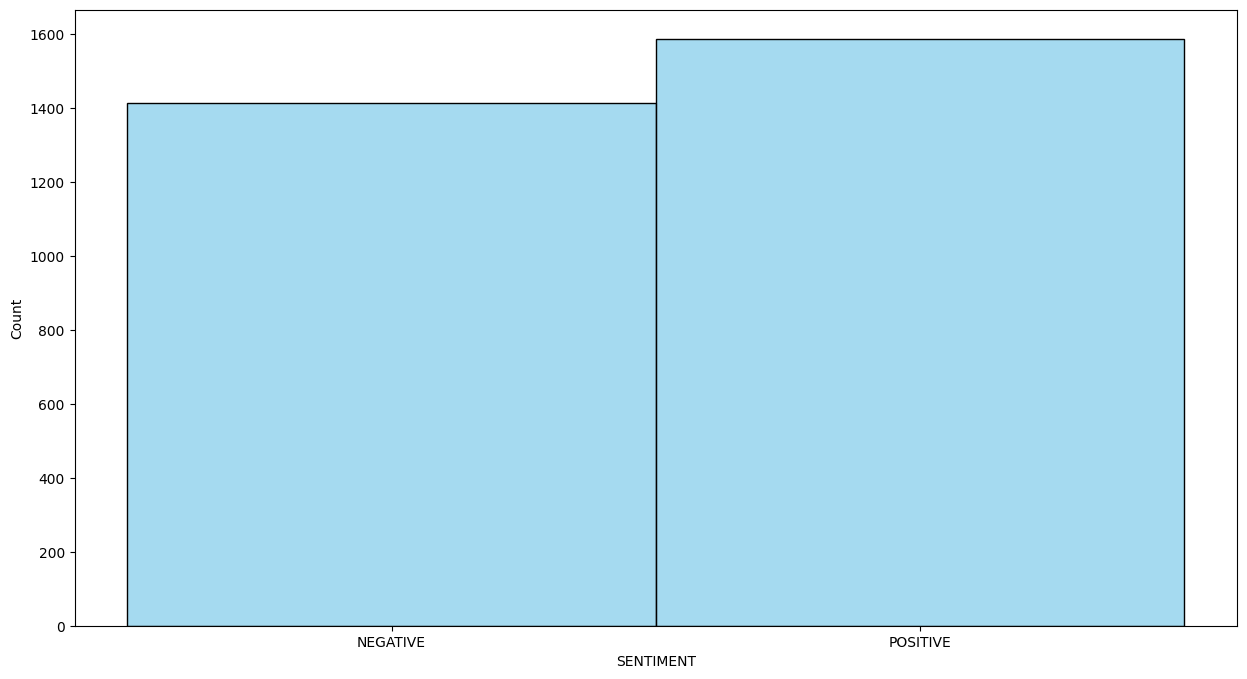

In [ ]:
fig, axes = plt.subplots(1,1, figsize = (15, 8))

sns.histplot(data = df, x = 'SENTIMENT', color='skyblue')

#Pre-processing

In [ ]:
import re

def remove_mentions(tweet):
    # Menggunakan regular expression untuk menghapus tanda "@" dan nama pengguna
    cleaned_tweet = re.sub(r'@\w+', '', tweet)
    return cleaned_tweet

# Contoh penggunaan
df['TWEETS'] = df['TWEETS'].apply(remove_mentions)
df


,TWEETS,SENTIMENT
0,"Pada viralin jalan rusak di Lampung, padahal ...",NEGATIVE
1,"Daripada kalian hina2 pak kardi, coba kalia...",POSITIVE
2,tidak satupun yang percaya Anies bebas memili...,NEGATIVE
3,Mana mau anies nya,NEGATIVE
4,jeklingko anies cuma mengganti nama doang..,NEGATIVE
...,...,...
2995,Terus kenapa Cebong takut ama Anies? Tiapa ha...,NEGATIVE
2996,"Sholat pencintraan, dia muslim terus suruh k...",NEGATIVE
2997,Anis pinter tapi Ganjar lebih bejo,NEGATIVE
2998,"Kalau survei Anies kalah,itu survei bayaran,p...",POSITIVE


cleaning

In [ ]:
# Fungsi untuk menghapus tagar dari teks
def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)

# Menghapus tagar dari kolom teks tweet
df['TWEETS'] = df['TWEETS'].apply(remove_hashtags)
df

,TWEETS,SENTIMENT
0,"Pada viralin jalan rusak di Lampung, padahal ...",NEGATIVE
1,"Daripada kalian hina2 pak kardi, coba kalia...",POSITIVE
2,tidak satupun yang percaya Anies bebas memili...,NEGATIVE
3,Mana mau anies nya,NEGATIVE
4,jeklingko anies cuma mengganti nama doang..,NEGATIVE
...,...,...
2995,Terus kenapa Cebong takut ama Anies? Tiapa ha...,NEGATIVE
2996,"Sholat pencintraan, dia muslim terus suruh k...",NEGATIVE
2997,Anis pinter tapi Ganjar lebih bejo,NEGATIVE
2998,"Kalau survei Anies kalah,itu survei bayaran,p...",POSITIVE


In [ ]:
import string

def cleaningText(text):
    text = re.sub(r'@\w+', '', text) # menghapus mentions
    text = re.sub(r'#\w+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus numbers

    text = text.replace('<br>', ' ') # replace <br> ke dalam spasi
    text = text.replace('\n', ' ') # replace baris baru ke dalam spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # Menghapus semua tanda baca
    text = text.strip(' ') # hapus spasi karakter dari teks kiri dan kanan
    return text

# Menghapus tagar dari kolom teks tweet
df['TWEETS'] = df['TWEETS'].apply(cleaningText)
df

,TWEETS,SENTIMENT
0,Pada viralin jalan rusak di Lampung padahal ad...,NEGATIVE
1,Daripada kalian hina pak kardi coba kalian ray...,POSITIVE
2,tidak satupun yang percaya Anies bebas memilih...,NEGATIVE
3,Mana mau anies nya,NEGATIVE
4,jeklingko anies cuma mengganti nama doang,NEGATIVE
...,...,...
2995,Terus kenapa Cebong takut ama Anies Tiapa hari...,NEGATIVE
2996,Sholat pencintraan dia muslim terus suruh kege...,NEGATIVE
2997,Anis pinter tapi Ganjar lebih bejo,NEGATIVE
2998,Kalau survei Anies kalahitu survei bayaranpesa...,POSITIVE


remove tag and username

In [ ]:
tweet = df.TWEETS.values
sentiment = df.SENTIMENT.values

In [ ]:
#parsing html
from bs4 import BeautifulSoup
import re

def parseHtml(html):
  soup = BeautifulSoup(html, 'html.parser')
  return soup.get_text()

def removeDigits(string):
  for i in range(10):
    string=string.replace(str(i),' ')
  return string

#hapus html
tweet=list(map(parseHtml, tweet))

#hapus digits
tweet=list(map(removeDigits, tweet))

stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.auto import tqdm

fact = StemmerFactory()
stemmer = fact.create_stemmer()

for i, kalimat in tqdm(enumerate((df['TWEETS']))):
    df.loc[i, 'TWEETS'] = stemmer.stem(kalimat)

df['TWEETS'].head()

0it [00:00, ?it/s]

0    pada viralin jalan rusak di lampung padahal ad...
1    daripada kalian hina pak kardi coba kalian ray...
2      tidak satu yang percaya anies bebas pilih wakil
3                                   mana mau anies nya
4                jeklingko anies cuma ganti nama doang
Name: TWEETS, dtype: object

stopword removal

In [ ]:
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

more_stopword = ['dah','yah','p','byk','bang','om','lur','bro','bg','tuch','dech','sech','gpp','bung','sih','ko','ama','g','loe','lo','doang','dong','yang','kalian','sih','hrs','toh','kuy', 'yg', 'dg', 'dgn', 'lho', 'bae', 'pada', 'brt', 'nya', 'klo', 'kalau','krn', 'nya','nih','sih','wkwk', 'si', 'tuh', 'utk','jd', 'sdh', 'scr', 'tdk', 'yg', 'tp', 'lbh', 'dpt', 'kl', 'sja', 'dong', 'di', 'itu', 'g', 'mu','nanti', 'ko','ga', 'klu', 'lo']
stop_factory = StopWordRemoverFactory().get_stop_words()
stop_factory.remove('tidak')
merge_stopword = stop_factory + more_stopword
dictionary = ArrayDictionary(merge_stopword)
stopword = StopWordRemover(dictionary)

# print(factory)
for i, kalimat in tqdm(enumerate (df['TWEETS'])):
    df.loc[i, 'TWEETS'] = stopword.remove(kalimat)

df['TWEETS'].head()

0it [00:00, ?it/s]

0    viralin jalan rusak lampung padahal jalan bagu...
1    hina pak kardi coba kalian rayu untuk pilih an...
2           tidak satu percaya anies bebas pilih wakil
3                                       mana mau anies
4                      jeklingko anies cuma ganti nama
Name: TWEETS, dtype: object

In [ ]:
#tokenizing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')

df['TOKEN']=[nltk.word_tokenize(item.lower()) for item in df['TWEETS']]

df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,TWEETS,SENTIMENT,TOKEN
0,viralin jalan rusak lampung padahal jalan bagu...,NEGATIVE,"[viralin, jalan, rusak, lampung, padahal, jala..."
1,hina pak kardi coba kalian rayu untuk pilih an...,POSITIVE,"[hina, pak, kardi, coba, kalian, rayu, untuk, ..."
2,tidak satu percaya anies bebas pilih wakil,NEGATIVE,"[tidak, satu, percaya, anies, bebas, pilih, wa..."
3,mana mau anies,NEGATIVE,"[mana, mau, anies]"
4,jeklingko anies cuma ganti nama,NEGATIVE,"[jeklingko, anies, cuma, ganti, nama]"
...,...,...,...
2995,terus cebong takut anies tiapa hari gibahin fi...,NEGATIVE,"[terus, cebong, takut, anies, tiapa, hari, gib..."
2996,sholat pencintraan muslim terus suruh gereja g...,NEGATIVE,"[sholat, pencintraan, muslim, terus, suruh, ge..."
2997,anis pinter ganjar lebih bejo,NEGATIVE,"[anis, pinter, ganjar, lebih, bejo]"
2998,survei anies kalahitu survei bayaranpesanan pe...,POSITIVE,"[survei, anies, kalahitu, survei, bayaranpesan..."


In [ ]:
df['TOKEN_STR'] = df['TOKEN'].apply(lambda tokens: ' '.join(tokens))

save file

In [ ]:
file_path = "data_tweet_praproses2_nohash_noremtidak.csv"
df.to_csv(file_path, index=False)

#Referensi (abaikan)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
def tokenize_text(text):
    return word_tokenize(text)

# Melakukan tokenisasi pada kolom 'TWEETS'
df['TOKEN'] = df['TWEETS'].apply(tokenize_text)

# Menggabungkan token menjadi kalimat kembali (diperlukan oleh TfidfVectorizer)
df['TOKEN_STR'] = df['TOKEN'].apply(lambda tokens: ' '.join(tokens))

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Menghitung skor TF-IDF untuk seluruh dokumen
tfidf_matrix = tfidf_vectorizer.fit_transform(df['TWEETS_STR'])

# Membuat DataFrame hasil TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Menggabungkan DataFrame hasil TF-IDF dengan DataFrame asli
result_df = pd.concat([df, tfidf_df], axis=1)

# Menampilkan DataFrame hasil TF-IDF
print(result_df)